In [1]:
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

import ocean

Populating the interactive namespace from numpy and matplotlib


## Смоделируем несколько случаев.
### Хищников слишком много, они съедают жертв, а потом вымирают сами.

Рассмотрим этот случай на маленьком поле, чтобы можно было наблюдать состояние океана в каждый момент времени.

In [2]:
little_ocean = ocean.Ocean(m=5, n=5, n_predators=2, n_victims=2, n_walls=1)
N = 30
n_victims = [2,]
n_predators = [2,]
print little_ocean
for time in xrange(N):
    little_ocean.action()
    n_victims += [little_ocean.n_victims]
    n_predators += [little_ocean.n_predators]
    print little_ocean
    if little_ocean.n_victims * little_ocean.n_predators == 0:
        break
    print
print n_victims
print n_predators

{'wall': '#', 'predator': 'p', 'victim': 'v'}
#|#|#|#|#|#|#|
-+-+-+-+-+-+-+
#| |p| | | |#|
-+-+-+-+-+-+-+
#| | | | | |#|
-+-+-+-+-+-+-+
#| | |p| | |#|
-+-+-+-+-+-+-+
#| |v| |v|#|#|
-+-+-+-+-+-+-+
#| | | | | |#|
-+-+-+-+-+-+-+
#|#|#|#|#|#|#|
{'wall': '#', 'predator': 'p', 'victim': 'v'}
#|#|#|#|#|#|#|
-+-+-+-+-+-+-+
#| | | | | |#|
-+-+-+-+-+-+-+
#| | |p| | |#|
-+-+-+-+-+-+-+
#| |p| | | |#|
-+-+-+-+-+-+-+
#| | | | |#|#|
-+-+-+-+-+-+-+
#| | |v| | |#|
-+-+-+-+-+-+-+
#|#|#|#|#|#|#|

{'wall': '#', 'predator': 'p', 'victim': 'v'}
#|#|#|#|#|#|#|
-+-+-+-+-+-+-+
#| | | | | |#|
-+-+-+-+-+-+-+
#| |p| | | |#|
-+-+-+-+-+-+-+
#| | | | | |#|
-+-+-+-+-+-+-+
#| | |p| |#|#|
-+-+-+-+-+-+-+
#| |v| | | |#|
-+-+-+-+-+-+-+
#|#|#|#|#|#|#|

{'wall': '#', 'predator': 'p', 'victim': 'v'}
#|#|#|#|#|#|#|
-+-+-+-+-+-+-+
#| |p| | | |#|
-+-+-+-+-+-+-+
#| | | | | |#|
-+-+-+-+-+-+-+
#| | | | | |#|
-+-+-+-+-+-+-+
#| | | | |#|#|
-+-+-+-+-+-+-+
#| | |p| | |#|
-+-+-+-+-+-+-+
#|#|#|#|#|#|#|
[2, 1, 1, 0]
[2, 2, 2, 2]


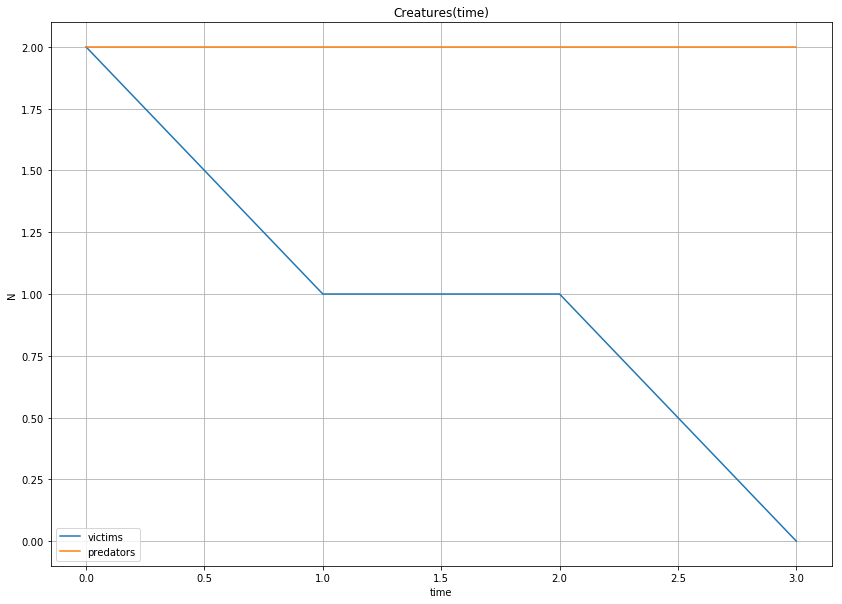

In [3]:
plt.figure(figsize=(14, 10))
N = len(n_victims)
plt.plot(range(N), n_victims, label='victims')
plt.plot(range(N), n_predators, label='predators')
plt.grid(True)
plt.legend(loc='best')
plt.xlabel('time')
plt.ylabel('N')
plt.title('Creatures(time)')
plt.show()

### Следующий случай - слишком мало хищников, они быстро вымирают, а жертвы неконтролируемо размножаются.

In [4]:
victims_ocean = ocean.Ocean(m=30, n=30, n_victims=200, n_predators=10, n_walls=50)

In [5]:
N = 10**3
ans = victims_ocean.emulate(N)

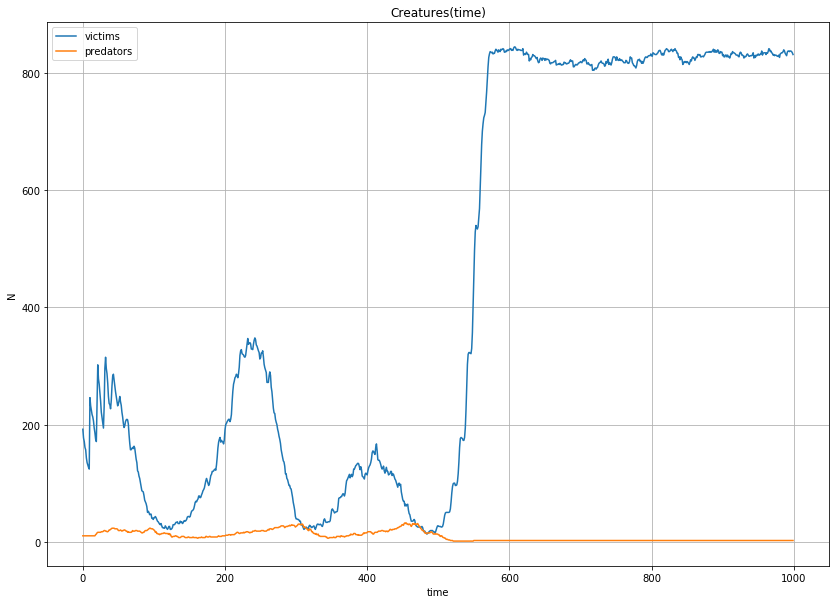

In [6]:
plt.figure(figsize=(14, 10))
N = len(ans[0])
plt.plot(range(N), ans[0], label='victims')
plt.plot(range(N), ans[1], label='predators')
plt.grid(True)
plt.legend(loc='best')
plt.xlabel('time')
plt.ylabel('N')
plt.title('Creatures(time)')
plt.show()

### Сбалансированный вариант, когда выполняется гипотеза о цикличности кол-ва жертв и хищников.

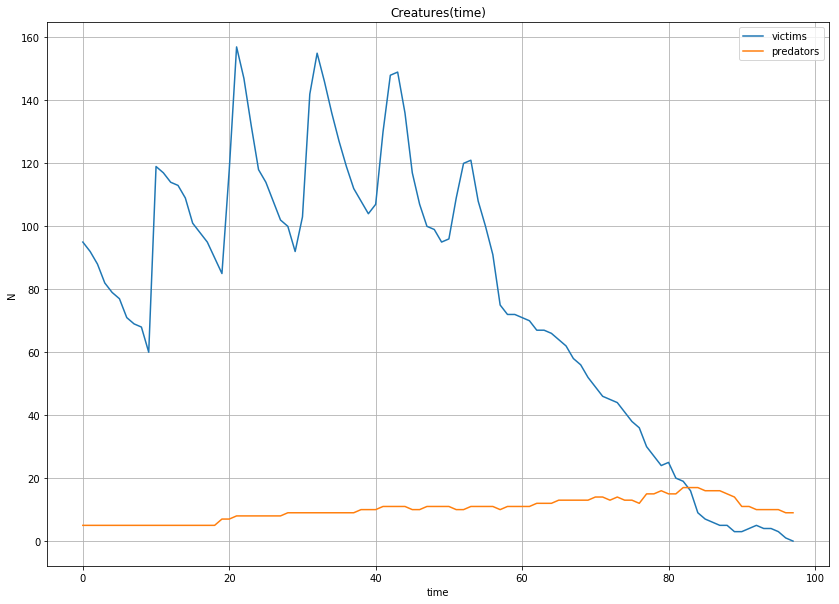

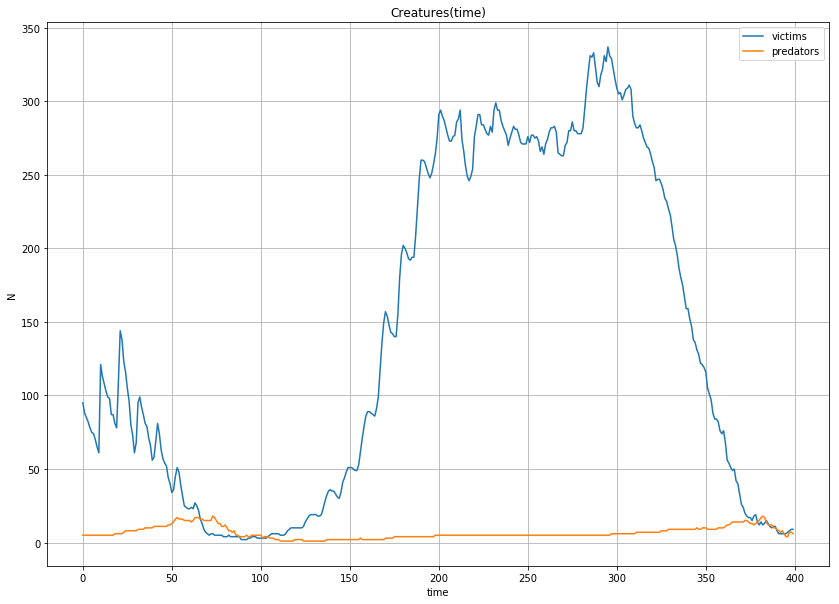

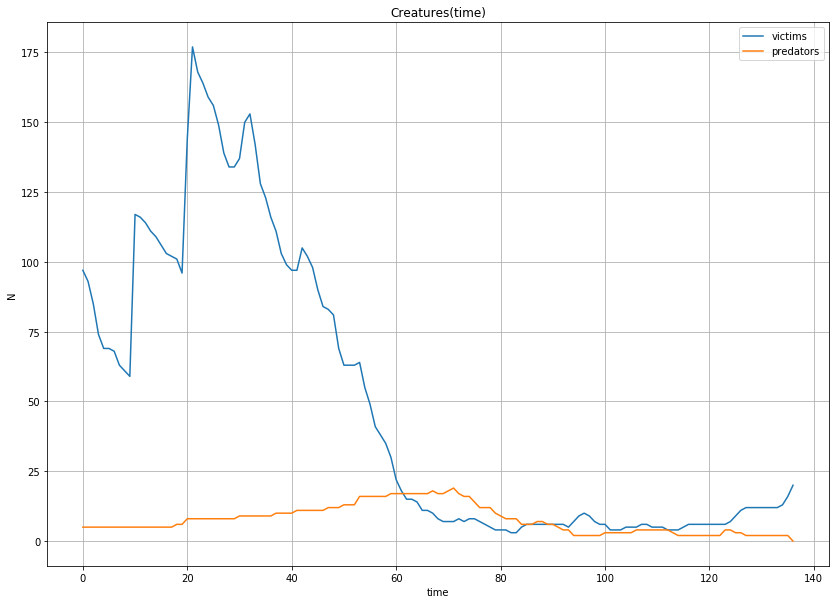

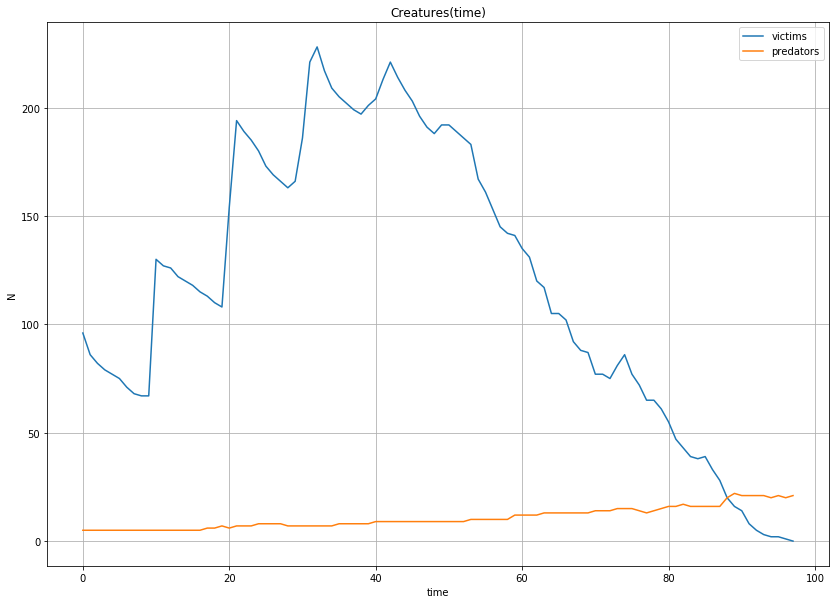

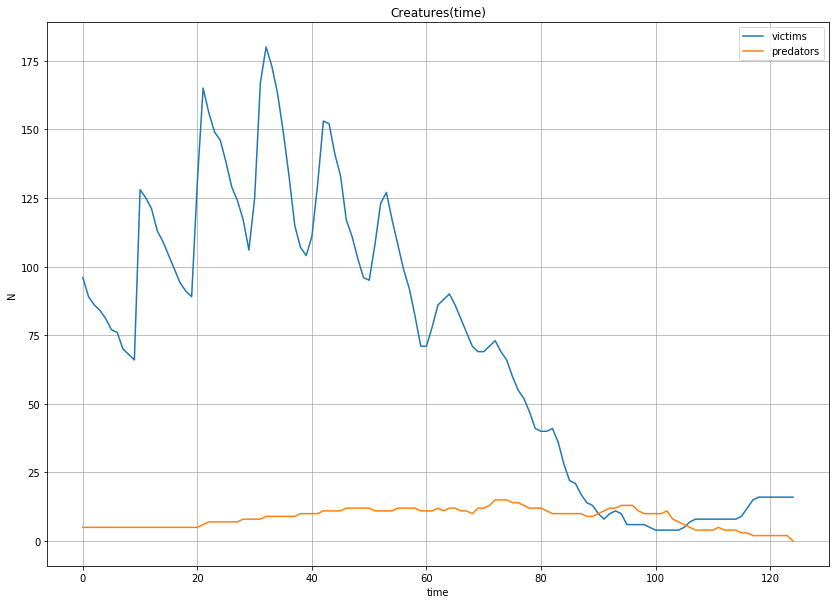

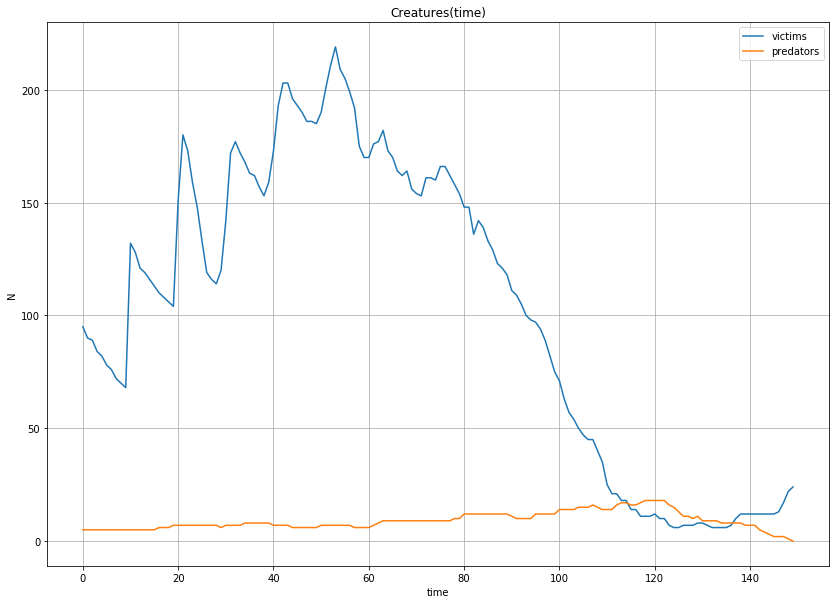

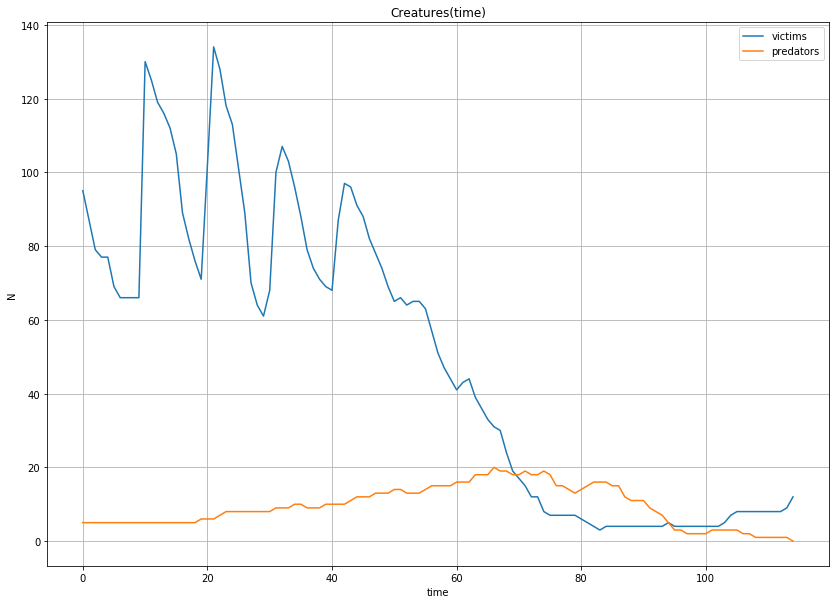

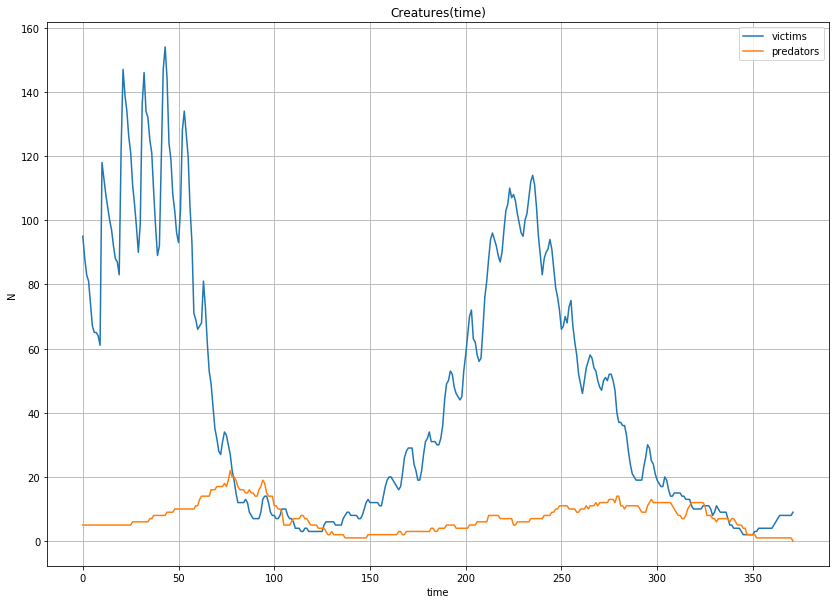

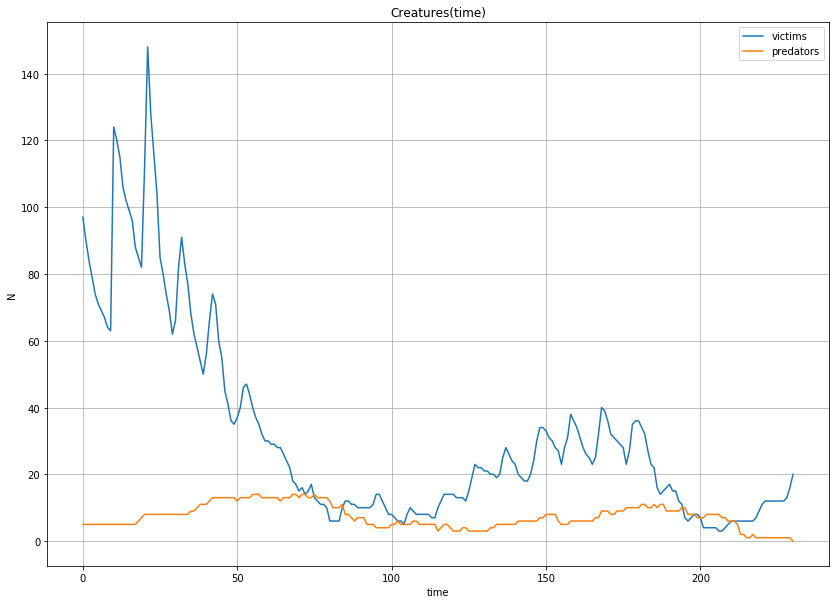

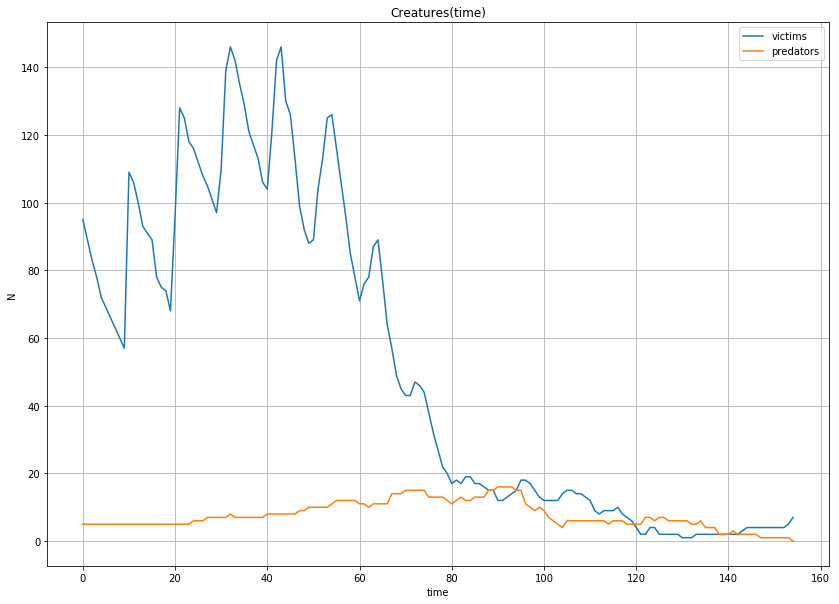

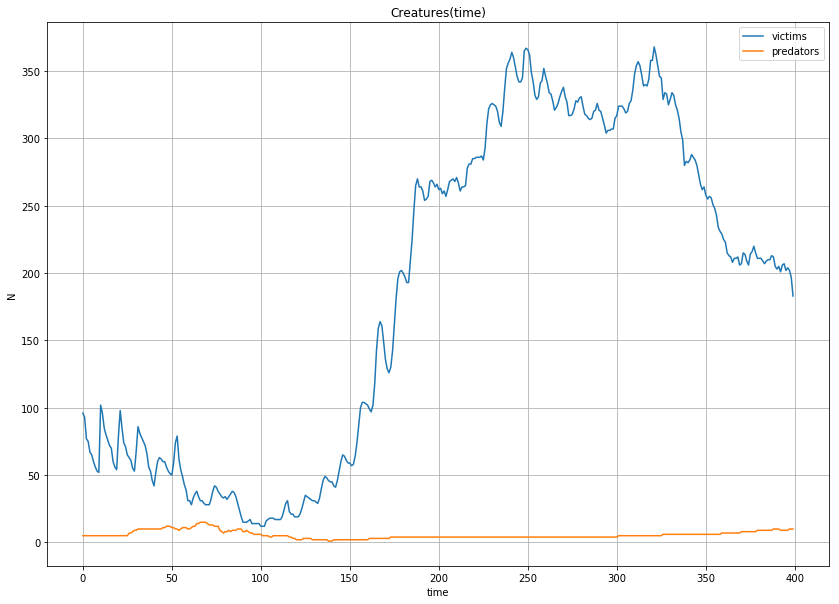

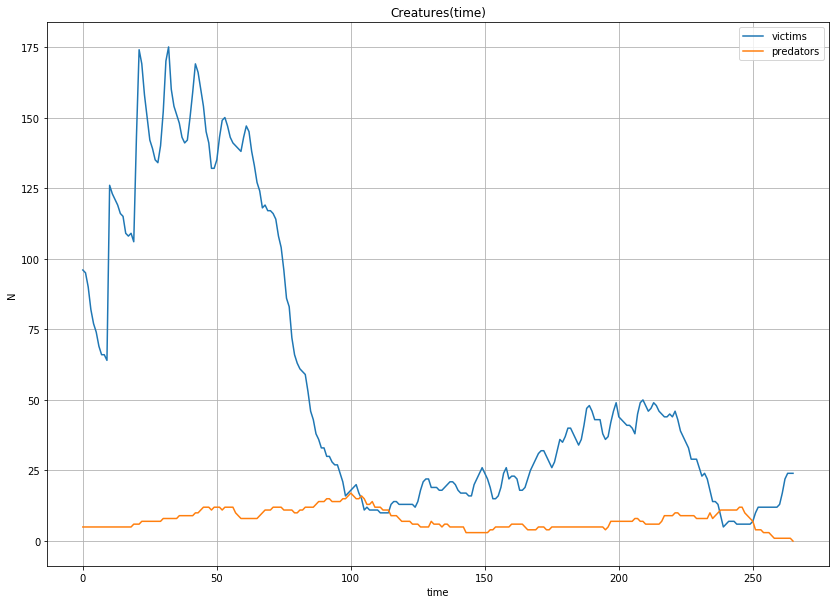

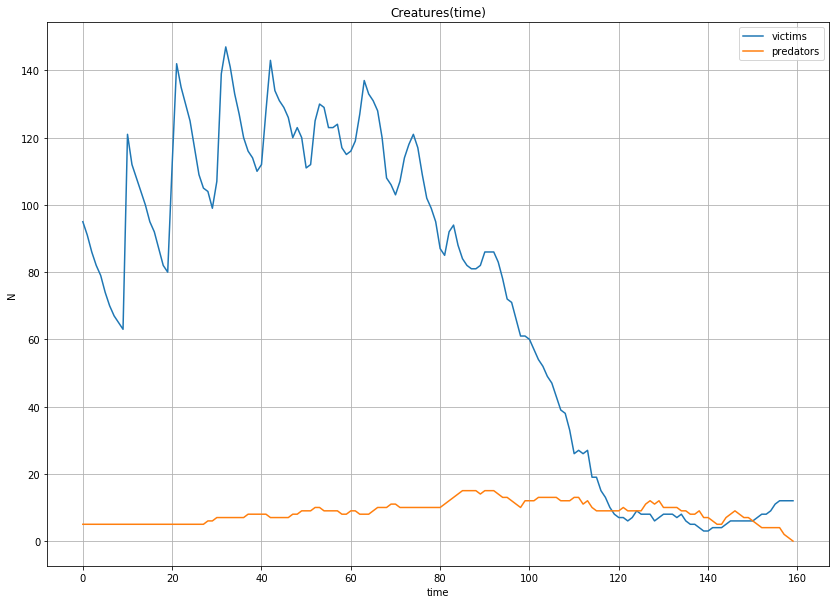

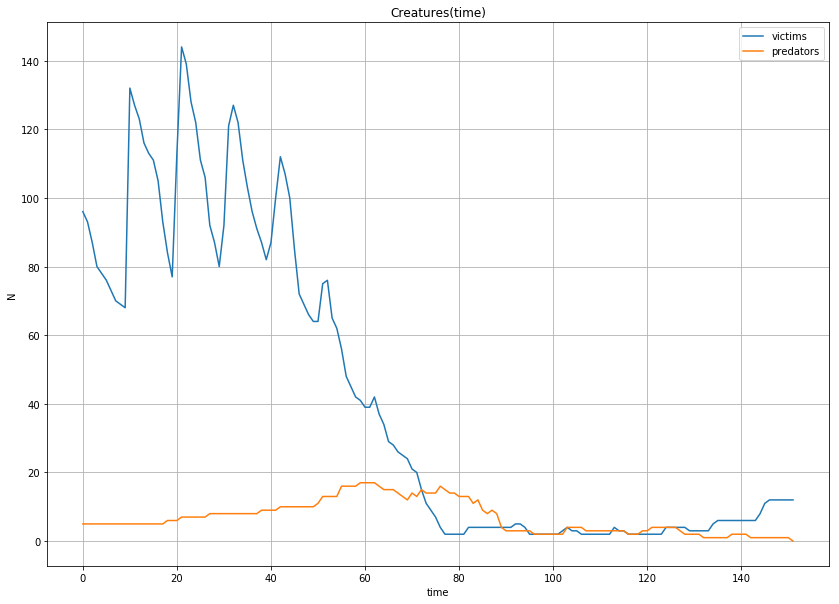

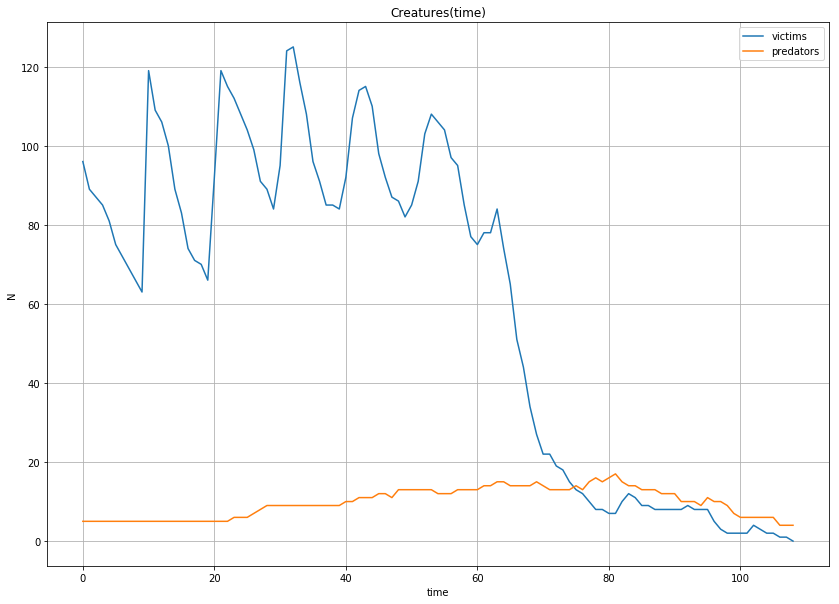

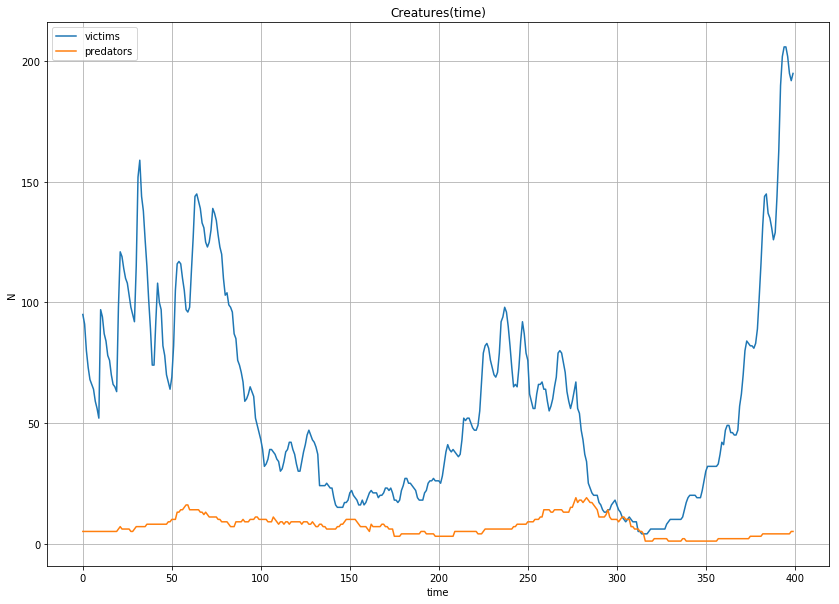

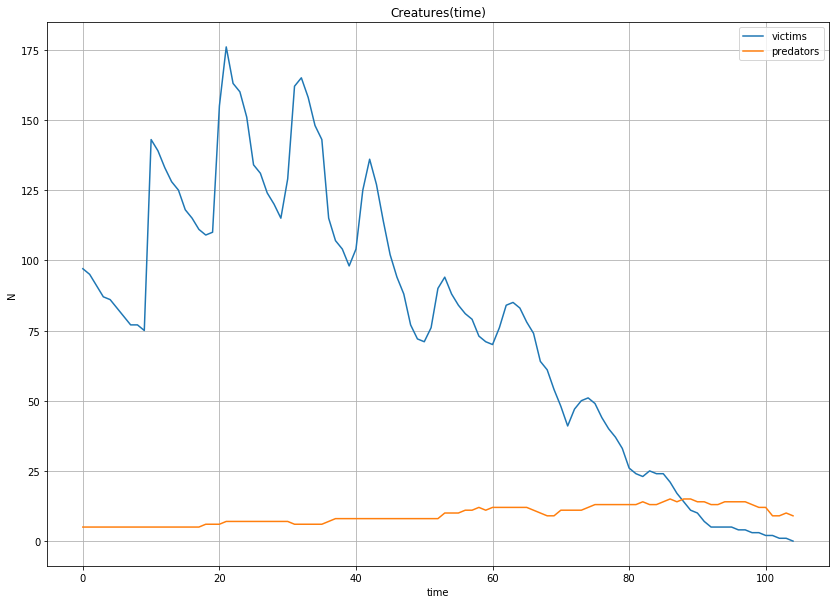

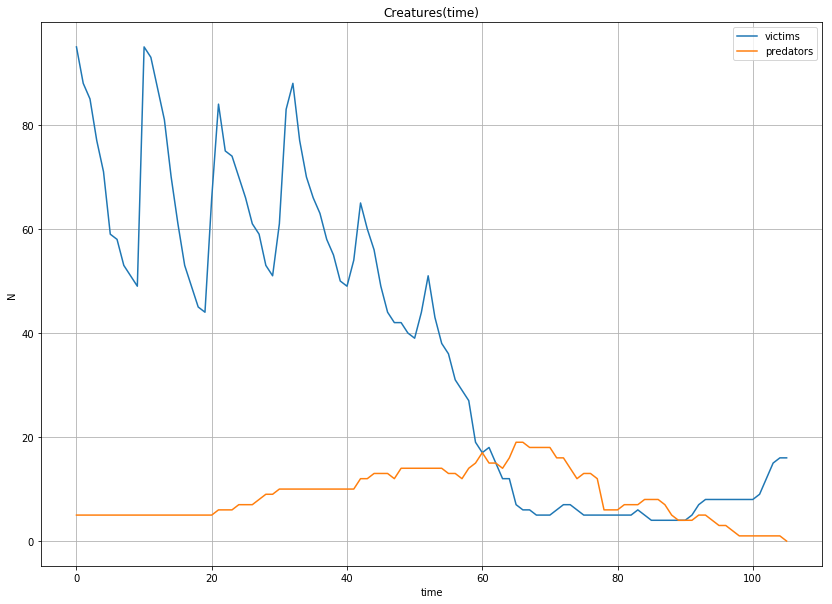

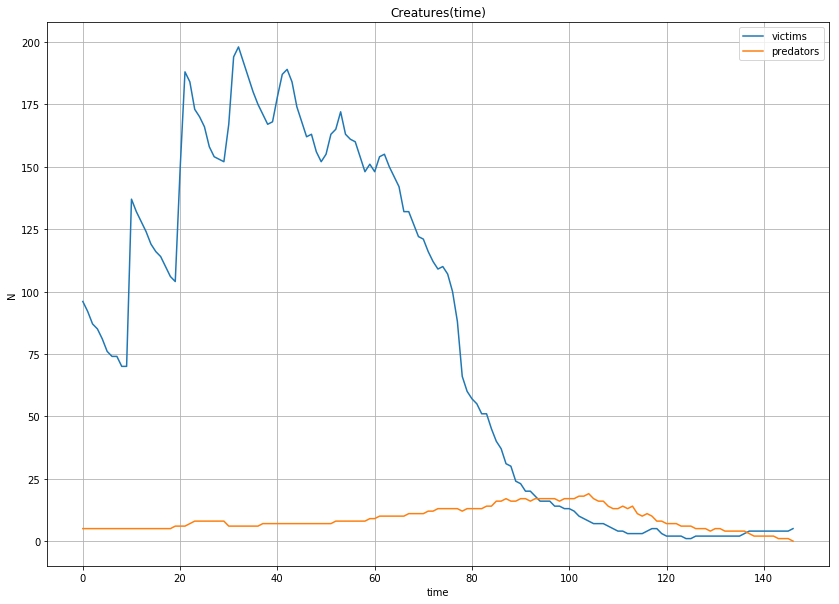

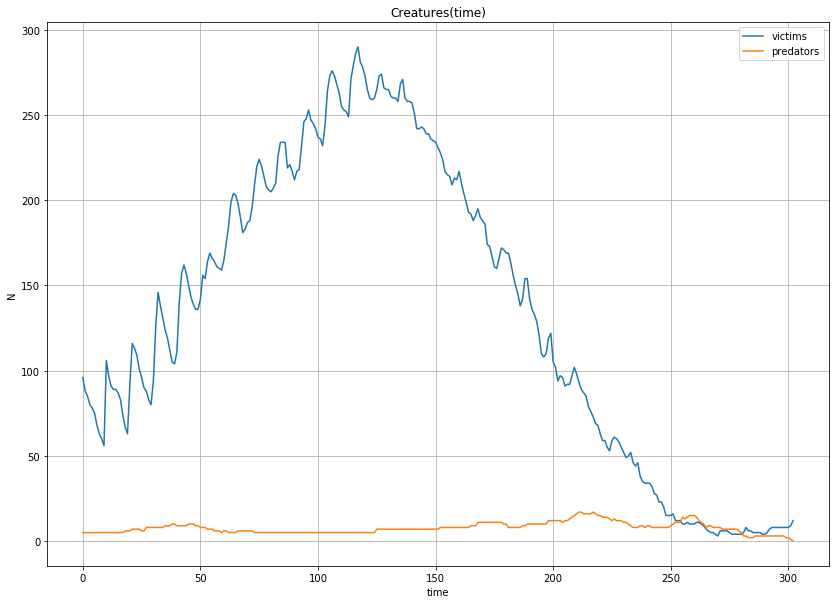

In [7]:
for i in xrange(20):
    
    my_ocean = ocean.Ocean(m=20, n=20, n_victims=100, n_predators=5)
    #print my_ocean

    N = 400
    ans = my_ocean.emulate(N)

    plt.figure(figsize=(14, 10))
    N = len(ans[0])
    plt.plot(range(N), ans[0], label='victims')
    plt.plot(range(N), ans[1], label='predators')
    plt.grid(True)
    plt.legend(loc='best')
    plt.xlabel('time')
    plt.ylabel('N')
    plt.title('Creatures(time)')
    plt.show()

Как мне кажется гипотеза не совсем верна и довольно сложно подобрать параметры, чтобы она выполнялась, так как ситуация очень сильно зависит от рандома - начального положения существ и ходов. Но случаются определенные моменты цикличности.